In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('downloads/IMDB Dataset.csv')

print(data)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [3]:
sentiments = data['sentiment']
sentiments = sentiments.replace({"positive": 1, "negative": 0})

2.Define a text preprocessing pipeline, i.e., stopword removal, lower casing, punctuation removal etc
1.Define your own train-val-test split. Ratio : (train: 18: test : 5 , val : 2)

In [4]:
import nltk
import re
nltk.download('stopwords')

from nltk.corpus import stopwords 
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() 
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    text = BAD_SYMBOLS_RE.sub('', text) 
    text = text.replace('x', '')
    text = text.replace('\d+', '')
    
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

reviews =data['review'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\debon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
X_train, X_test, y_train, y_test = train_test_split(reviews,sentiments,test_size=0.2, random_state=1)
X_train,X_val, y_train, y_val =train_test_split(X_train, y_train,test_size=0.1, random_state=1 )

In [6]:
print(X_test.shape)
print(X_train.shape)
print(X_val.shape)

(10000,)
(36000,)
(4000,)


Developing ML methods:
1. Model a Naive Bayes classifier.
a. Count vectorizer features.
b. TF-IDF features.


In [7]:
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
clf = MultinomialNB()
clf.fit(X_train_count, y_train)

X_test_count = vectorizer.transform(X_test)
y_pred = clf.predict(X_test_count)
accuracy = accuracy_score(y_test, y_pred)


In [8]:
print(accuracy*100)

86.16


In [9]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

X_test_tfidf = vectorizer.transform(X_test)
y_pred = clf.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(y_test, y_pred)

In [10]:
print(accuracy_tfidf*100)

86.91


3. ii ) Model a decision tree with TF-IDF features

In [11]:
clf = DecisionTreeClassifier()
clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)
accuracy_dec = accuracy_score(y_test, y_pred)

In [12]:
print(accuracy_dec*100)

71.74000000000001


4. Developing Deep neural networks:

    a. RNN model.
    
      1. 64 hidden-vector dimension.


In [72]:
# helps in model building
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import InputLayer
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import Bidirectional
from keras.layers import LSTM
from keras.callbacks import EarlyStopping

In [14]:
# helps in text preprocessing
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer

t = Tokenizer()
t.fit_on_texts(X_train)

In [15]:
encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)
encoded_val = t.texts_to_sequences(X_val)
print(encoded_train[0:2])

[[1148, 3671, 9852, 849, 1119, 376, 21997, 51, 34614, 1639, 58, 93, 89, 1417, 3587, 536, 1739, 2053, 23070, 1246, 68414, 17410, 1701, 90, 13784, 2988, 1, 21, 42, 63, 4406, 4239, 136, 5, 10514, 52, 86, 70, 21998, 1601, 51, 86, 6, 2, 521, 700, 81, 415, 2325, 921, 3, 158, 921, 104, 511, 13, 13, 45], [14, 255, 4966, 3760, 10326, 345, 42, 99, 1588, 14928, 2471, 40, 496, 38398, 126, 6151, 2374, 162, 155, 1155, 3207, 124, 395, 78, 337, 13161, 5, 39, 1848, 3461, 43767, 22, 1853, 9252, 1, 124, 61, 42, 128, 817, 2149, 187, 719, 468, 151, 145, 44, 419, 54, 817, 416, 42, 735, 7, 3497, 5, 369, 596, 21022, 1015, 51982, 1, 42, 183, 821, 2919, 14, 5, 249, 68415, 1002, 8612, 6208, 54, 817, 2567, 5, 1890, 50, 7968, 250, 4101, 2316, 54, 685, 335, 12584, 1, 1716, 99, 1525, 1616, 409, 70, 118, 108, 1442, 266, 187, 12306, 6387, 77, 127, 8494, 2283, 298, 2132, 12306, 37, 1566, 5268, 43768, 304, 68416, 4223, 817, 1008, 1222, 1027, 97, 15, 1483, 56, 94, 176, 409, 1303, 42, 12584, 1, 11, 441, 354, 47, 5311, 104

In [16]:
max_length = 64
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')
padded_val = pad_sequences(encoded_val, maxlen=max_length, padding='post')
print(padded_train)

[[  1148   3671   9852 ...      0      0      0]
 [    97     15   1483 ...     42     54    809]
 [ 43769   7556    490 ...    258     47  68421]
 ...
 [    47   3480      4 ...   1285   1347   2052]
 [  3017   3017 139062 ...   8505  20062    503]
 [   110   1339   5355 ...      0      0      0]]


In [45]:
vocab_size = len(t.word_index) + 1
# define the model
RNNModel64 = Sequential(name="SimpleRNNModel64")
RNNModel64.add(Embedding(vocab_size, 64, input_length=max_length))
RNNModel64.add(SimpleRNN(64, return_sequences=False))
RNNModel64.add(Dense(64, activation='relu'))
RNNModel64.add(keras.layers.Dropout(0.5))
RNNModel64.add(Dense(1, activation='relu'))


opt = keras.optimizers.Adam(1e-5)

# compile the model
RNNModel64.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(RNNModel64.summary())

Model: "SimpleRNNModel64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 64, 64)            8900032   
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,912,513
Trainable params: 8,912,513
Non-trainable params: 0
_________________________________________________________________
None


In [46]:
def plot_training_graph(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Epoch 1/100
1125/1125 [==============================] - 115s 101ms/step - loss: 2.5126 - accuracy: 0.5008 - val_loss: 0.7675 - val_accuracy: 0.5063
Epoch 2/100
1125/1125 [==============================] - 113s 101ms/step - loss: 0.9826 - accuracy: 0.5072 - val_loss: 0.7182 - val_accuracy: 0.5002
Epoch 3/100
1125/1125 [==============================] - 118s 105ms/step - loss: 0.9051 - accuracy: 0.5122 - val_loss: 0.7187 - val_accuracy: 0.5038
Epoch 4/100
1125/1125 [==============================] - 144s 128ms/step - loss: 0.8719 - accuracy: 0.5154 - val_loss: 0.7069 - val_accuracy: 0.5060
Epoch 5/100
1125/1125 [==============================] - 151s 134ms/step - loss: 0.8503 - accuracy: 0.5225 - val_loss: 0.7049 - val_accuracy: 0.5085
Epoch 6/100
1125/1125 [==============================] - 115s 102ms/step - loss: 0.8081 - accuracy: 0.5312 - val_loss: 0.7008 - val_accuracy: 0.5157
Epoch 7/100
1125/1125 [==============================] - 114s 101ms/step - loss: 0.7954 - accuracy: 0.5314

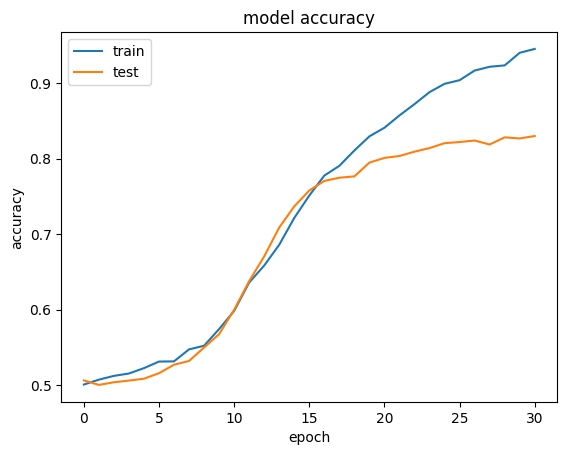

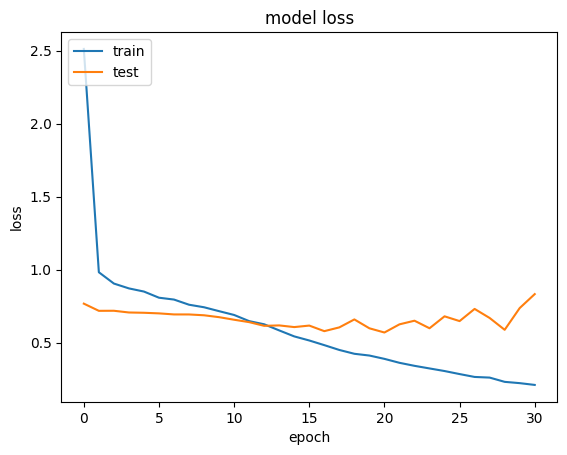

In [47]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# fit the model
history = RNNModel64.fit(x=padded_train,
         y=y_train,
         epochs=100,
         validation_data=(padded_val, y_val), verbose=1,
         callbacks=[early_stop]
         )
plot_training_graph(history)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : "+ str(acc_sc))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5, 
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

In [55]:
preds_rnn_64 = (RNNModel64.predict(padded_test) > 0.5).astype("int32")

313/313 [==============================] - 1s 3ms/step


In [56]:
c_report(y_test, preds_rnn_64)

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      5044
           1       0.83      0.85      0.84      4956

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Accuracy : 0.8398


0.8398

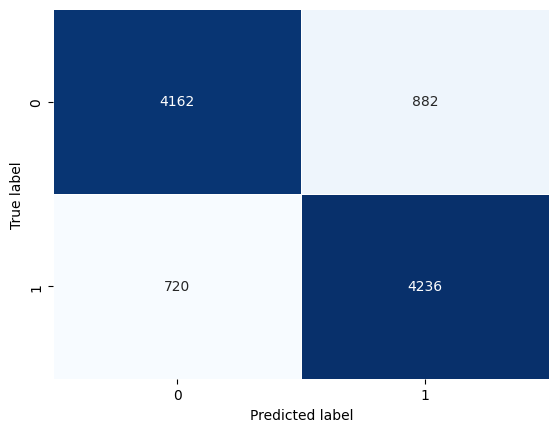

In [57]:
plot_confusion_matrix(y_test, preds_rnn_64)

4. Developing Deep neural networks:

    a. RNN model.
    
      2. 256 hidden-vector dimension.


In [63]:
# define the model
RNNModel256 = Sequential(name="SimpleRNNModel256")
RNNModel256.add(Embedding(vocab_size, 256, input_length=max_length))
RNNModel256.add(SimpleRNN(256, return_sequences=False))
RNNModel256.add(Dense(256, activation='relu'))
RNNModel256.add(keras.layers.Dropout(0.5))
RNNModel256.add(Dense(1, activation='relu'))


opt = keras.optimizers.Adam(learning_rate=1e-5)

# compile the model
RNNModel256.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(RNNModel256.summary())

Model: "SimpleRNNModel256"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 64, 256)           35600128  
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 256)               65792     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 257       
                                                                 
Total params: 35,797,505
Trainable params: 35,797,505
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/100
1125/1125 [==============================] - 514s 456ms/step - loss: 1.8721 - accuracy: 0.5036 - val_loss: 0.7164 - val_accuracy: 0.5128
Epoch 2/100
1125/1125 [==============================] - 451s 401ms/step - loss: 0.9338 - accuracy: 0.5159 - val_loss: 0.7018 - val_accuracy: 0.5310
Epoch 3/100
1125/1125 [==============================] - 475s 422ms/step - loss: 0.8536 - accuracy: 0.5385 - val_loss: 0.6928 - val_accuracy: 0.5445
Epoch 4/100
1125/1125 [==============================] - 476s 423ms/step - loss: 0.7736 - accuracy: 0.5683 - val_loss: 0.6766 - val_accuracy: 0.5742
Epoch 5/100
1125/1125 [==============================] - 481s 427ms/step - loss: 0.7163 - accuracy: 0.6034 - val_loss: 0.6616 - val_accuracy: 0.6028
Epoch 6/100
1125/1125 [==============================] - 419s 372ms/step - loss: 0.6339 - accuracy: 0.6693 - val_loss: 0.5937 - val_accuracy: 0.7048
Epoch 7/100
1125/1125 [==============================] - 472s 420ms/step - loss: 0.5759 - accuracy: 0.7365

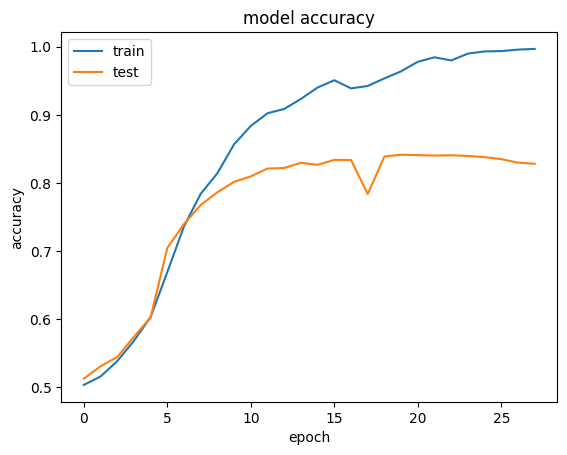

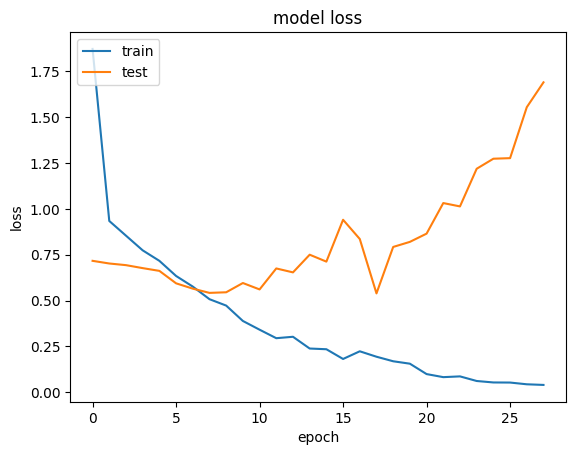

In [64]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# fit the model
history = RNNModel256.fit(x=padded_train,
         y=y_train,
         epochs=100,
         validation_data=(padded_val, y_val), verbose=1,
         callbacks=[early_stop]
         )
plot_training_graph(history)

In [68]:
preds_rnn_256 = (RNNModel256.predict(padded_test) > 0.5).astype("int32")

313/313 [==============================] - 4s 11ms/step


In [69]:
c_report(y_test, preds_rnn_256)

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      5044
           1       0.82      0.85      0.83      4956

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

Accuracy : 0.8338


0.8338

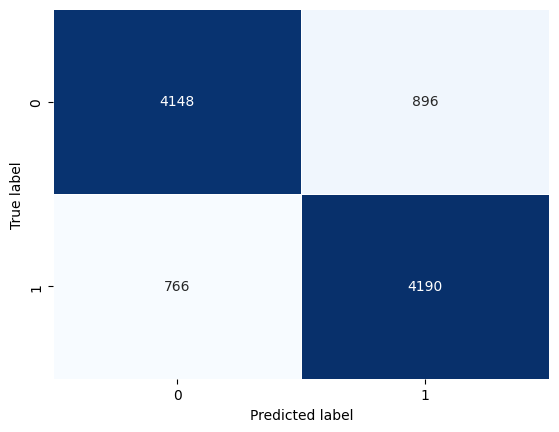

In [70]:
plot_confusion_matrix(y_test, preds_rnn_256)

4. Developing Deep neural networks:

    b. 1-layer LSTM model


In [73]:
# define the model
SingleLSTMLayer64 = Sequential(name="SingleLSTMLayer64")
SingleLSTMLayer64.add(Embedding(vocab_size, 256, input_length=max_length))
SingleLSTMLayer64.add(LSTM(64, return_sequences=False))
SingleLSTMLayer64.add(Dense(64, activation='relu'))
SingleLSTMLayer64.add(keras.layers.Dropout(0.5))
SingleLSTMLayer64.add(Dense(1, activation='relu'))


opt = keras.optimizers.Adam(learning_rate=1e-5)

# compile the model
SingleLSTMLayer64.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(SingleLSTMLayer64.summary())

Model: "SingleLSTMLayer64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 64, 256)           35600128  
                                                                 
 lstm (LSTM)                 (None, 64)                82176     
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 35,686,529
Trainable params: 35,686,529
Non-trainable params: 0
_________________________________________________________________
None


In [74]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# fit the model
history = SingleLSTMLayer64.fit(x=padded_train,
         y=y_train,
         epochs=100,
         validation_data=(padded_val, y_val), verbose=1,
         callbacks=[early_stop]
         )
plot_training_graph(history)

Epoch 1/100
1125/1125 [==============================] - 519s 457ms/step - loss: 3.0291 - accuracy: 0.4984 - val_loss: 1.6284 - val_accuracy: 0.5030
Epoch 2/100
1125/1125 [==============================] - 502s 446ms/step - loss: 1.6002 - accuracy: 0.4984 - val_loss: 1.3833 - val_accuracy: 0.5030
Epoch 3/100
1125/1125 [==============================] - 520s 462ms/step - loss: 1.3438 - accuracy: 0.4984 - val_loss: 1.2049 - val_accuracy: 0.5030
Epoch 4/100
1125/1125 [==============================] - 498s 443ms/step - loss: 1.1467 - accuracy: 0.4986 - val_loss: 1.0066 - val_accuracy: 0.5030
Epoch 5/100
1125/1125 [==============================] - 490s 435ms/step - loss: 0.9234 - accuracy: 0.5045 - val_loss: 0.7737 - val_accuracy: 0.5140
Epoch 6/100
1125/1125 [==============================] - 489s 434ms/step - loss: 0.7440 - accuracy: 0.5361 - val_loss: 0.6633 - val_accuracy: 0.5968
Epoch 7/100
1125/1125 [==============================] - 506s 449ms/step - loss: 0.6625 - accuracy: 0.6042

KeyboardInterrupt: 

In [75]:
preds_1_lstm_64 = (SingleLSTMLayer64.predict(padded_test) > 0.5).astype("int32")

313/313 [==============================] - 4s 10ms/step


In [76]:
c_report(y_test, preds_1_lstm_64)

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      5044
           1       0.86      0.84      0.85      4956

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000

Accuracy : 0.8549


0.8549

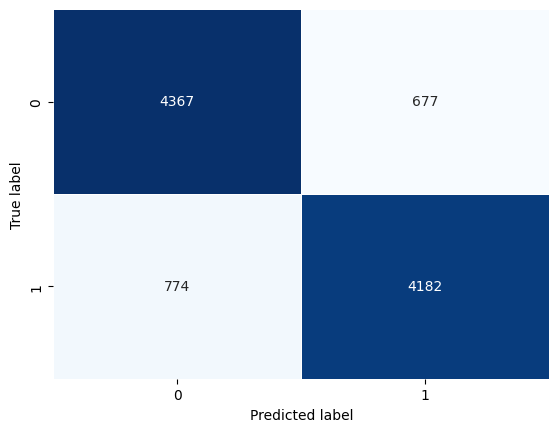

In [77]:
plot_confusion_matrix(y_test, preds_1_lstm_64)

4. Developing Deep neural networks:

    c. 2-layer LSTM model


In [78]:
# define the model
DoubleLSTMLayer64 = Sequential(name="DoubleLSTMLayer64")
DoubleLSTMLayer64.add(Embedding(vocab_size, 256, input_length=max_length))
DoubleLSTMLayer64.add(LSTM(64, return_sequences=True))
DoubleLSTMLayer64.add(LSTM(32, return_sequences=True))
DoubleLSTMLayer64.add(Dense(32, activation='relu'))
DoubleLSTMLayer64.add(keras.layers.Dropout(0.5))
DoubleLSTMLayer64.add(Dense(1, activation='relu'))


opt = keras.optimizers.Adam(learning_rate=1e-5)

# compile the model
DoubleLSTMLayer64.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(DoubleLSTMLayer64.summary())

Model: "DoubleLSTMLayer64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 64, 256)           35600128  
                                                                 
 lstm_1 (LSTM)               (None, 64, 64)            82176     
                                                                 
 lstm_2 (LSTM)               (None, 64, 32)            12416     
                                                                 
 dense_18 (Dense)            (None, 64, 32)            1056      
                                                                 
 dropout_6 (Dropout)         (None, 64, 32)            0         
                                                                 
 dense_19 (Dense)            (None, 64, 1)             33        
                                                                 
Total params: 35,695,809
Trainable params: 35,695

In [79]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# fit the model
history = DoubleLSTMLayer64.fit(x=padded_train,
         y=y_train,
         epochs=100,
         validation_data=(padded_val, y_val), verbose=1,
         callbacks=[early_stop]
         )
plot_training_graph(history)

Epoch 1/100
1125/1125 [==============================] - 500s 442ms/step - loss: 2.2917 - accuracy: 0.4984 - val_loss: 1.6738 - val_accuracy: 0.5030
Epoch 2/100
1125/1125 [==============================] - 451s 401ms/step - loss: 1.5603 - accuracy: 0.4984 - val_loss: 1.3432 - val_accuracy: 0.5030
Epoch 3/100
1125/1125 [==============================] - 435s 387ms/step - loss: 1.2285 - accuracy: 0.4985 - val_loss: 1.0200 - val_accuracy: 0.5030
Epoch 4/100
  27/1125 [..............................] - ETA: 7:29 - loss: 1.0692 - accuracy: 0.4922

In [ ]:
preds_2_lstm_64 = (DoubleLSTMLayer64.predict(padded_test) > 0.5).astype("int32")

313/313 [==============================] - 3s 10ms/step


In [ ]:
c_report(y_test, preds_2_lstm_64)

Classification Report
              precision    recall  f1-score   support

           0       0.65      0.64      0.64      5044
           1       0.64      0.64      0.64      4956

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.64     10000
weighted avg       0.64      0.64      0.64     10000

Accuracy : 0.6421


0.6421

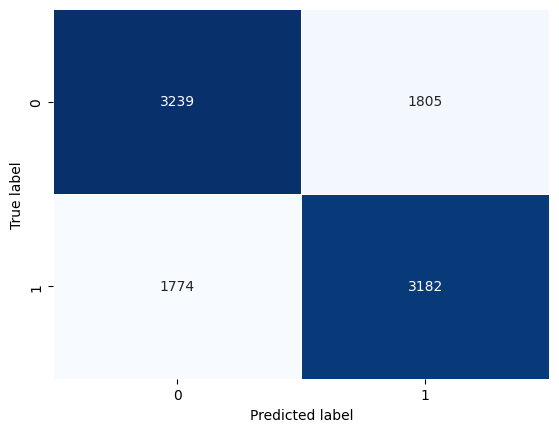

In [ ]:
plot_confusion_matrix(y_test, preds_2_lstm_64)

4. Developing Deep neural networks:

    d. 1-layer Bi-LSTM model


In [ ]:
# define the model
SingleBiLSTMModel = Sequential(name="SingleBiLSTMModel")
SingleBiLSTMModel.add(Embedding(vocab_size, 256, input_length=max_length))
SingleBiLSTMModel.add(Bidirectional(LSTM(64, return_sequences=True)))
SingleBiLSTMModel.add(Dense(32, activation='relu'))
SingleBiLSTMModel.add(keras.layers.Dropout(0.5))
SingleBiLSTMModel.add(Dense(1, activation='relu'))


opt = keras.optimizers.Adam(learning_rate=1e-5)

# compile the model
SingleBiLSTMModel.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(SingleBiLSTMModel.summary())

Model: "SimpleRNNModel256"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 64, 256)           35600128  
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 256)               65792     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 257       
                                                                 
Total params: 35,797,505
Trainable params: 35,797,505
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# fit the model
history = DoubleLSTMLayer64.fit(x=padded_train,
         y=y_train,
         epochs=100,
         validation_data=(padded_val, y_val), verbose=1,
         callbacks=[early_stop]
         )
plot_training_graph(history)

Epoch 1/100
1125/1125 [==============================] - 514s 456ms/step - loss: 1.8721 - accuracy: 0.5036 - val_loss: 0.7164 - val_accuracy: 0.5128
Epoch 2/100
1125/1125 [==============================] - 451s 401ms/step - loss: 0.9338 - accuracy: 0.5159 - val_loss: 0.7018 - val_accuracy: 0.5310
Epoch 3/100
1125/1125 [==============================] - 475s 422ms/step - loss: 0.8536 - accuracy: 0.5385 - val_loss: 0.6928 - val_accuracy: 0.5445
Epoch 4/100
1125/1125 [==============================] - 476s 423ms/step - loss: 0.7736 - accuracy: 0.5683 - val_loss: 0.6766 - val_accuracy: 0.5742
Epoch 5/100
1125/1125 [==============================] - 481s 427ms/step - loss: 0.7163 - accuracy: 0.6034 - val_loss: 0.6616 - val_accuracy: 0.6028
Epoch 6/100
1125/1125 [==============================] - 419s 372ms/step - loss: 0.6339 - accuracy: 0.6693 - val_loss: 0.5937 - val_accuracy: 0.7048
Epoch 7/100
1125/1125 [==============================] - 472s 420ms/step - loss: 0.5759 - accuracy: 0.7365

In [ ]:
preds_2_lstm_64 = (DoubleLSTMLayer64.predict(padded_test) > 0.5).astype("int32")

313/313 [==============================] - 3s 10ms/step


In [ ]:
c_report(y_test, preds_2_lstm_64)

Classification Report
              precision    recall  f1-score   support

           0       0.65      0.64      0.64      5044
           1       0.64      0.64      0.64      4956

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.64     10000
weighted avg       0.64      0.64      0.64     10000

Accuracy : 0.6421


0.6421

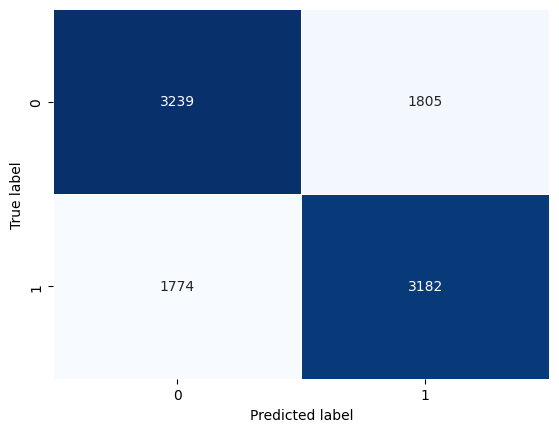

In [ ]:
plot_confusion_matrix(y_test, preds_2_lstm_64)